59.422


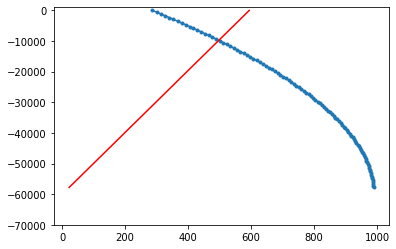

In [59]:
from matplotlib.animation import FuncAnimation
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from IPython.display import display, clear_output

fig = plt.figure(facecolor="#ffffff")
ax = fig.add_subplot(1, 1, 1) 

moho0 = 38.8e3

TM = 1573. # K - mantle potential
TS = 273.
QM = 18.0e-3 # mW/m2 - heatflow into the base of the lithosphere
QS = 60.e-3 #
AM = 0.02e-6 # uW/m3 - mantle lith
AC = 1.0e-6 # uW/m3 - crust
KM = 2.51 # W/m/K
KC = 2.51 # W/m/K

# T = Tt + (Qt/k)*z - (A/2k)*z*z

for i in range(20):
    z1 = moho0 + i*1e3
    z0 = 0.
    Z = np.linspace(z0,z1,100) # km
    dz = (z1-z0)/100. # negative since we are going bottom to top
    T = np.zeros(Z.shape)
    Q = np.zeros(Z.shape)

    for j in (range(len(Z))):
        tt = TS if j==0 else T[j-1]
        qt = QS if j==0 else Q[j-1]
        z = Z[j]
        a = AM if z > z1 else AC
        k = KM if z > z1 else KC
        Tb = tt + qt/k*(dz) - (a/2/k)*dz*dz
        Qb = qt - a*dz
        T[j] = Tb
        Q[j] = Qb
    
    print(Q[0]*1e3)
        
    ax.cla()
    ax.plot(T,-Z,'.-')
    ax.set_ylim([-70.e3,1.e3])
    #ax.set_xlim([273, 1600])
    display(fig) 
    clear_output(wait = True)
    plt.pause(0.1)


